In [13]:
import numpy as np

# from model.models import *

import torch
import torch.nn.functional as F

import matplotlib.pyplot as plt
%matplotlib inline 

In [14]:
from model.encoder_decoder_GT import Encoder_Decoder_GPT

joint_dims = 66
seq_len = 60
target_offset = 60
step_size = 60
hidden_size = 1024

is_cuda = torch.cuda.is_available()
# If we have a GPU available, we'll set our device to GPU. We'll use this device variable later in our code.
if is_cuda:
    device = torch.device("cuda")
else:
    device = torch.device("cpu")

model = Encoder_Decoder_GPT(n_layer=3, n_head=6, n_embd=192, vocab_size=joint_dims, block_size=seq_len, pdrop=0.1, device=device)
model.load_state_dict(torch.load('model/trained_model_data/ED_GT_offset60_direct_statedict.pt', map_location=device))
model.eval()

number of parameters: 1.36M
number of parameters: 1.36M


Encoder_Decoder_GPT(
  (encoder): Encoder_GPT(
    (transformer): ModuleDict(
      (wte): Linear(in_features=66, out_features=192, bias=True)
      (wpe): Embedding(60, 192)
      (drop): Dropout(p=0.1, inplace=False)
      (h): ModuleList(
        (0-2): 3 x BertBlock(
          (attention): MultiheadAttention(
            (out_proj): NonDynamicallyQuantizableLinear(in_features=192, out_features=192, bias=True)
          )
          (feed_forward): ModuleDict(
            (c_fc): Linear(in_features=192, out_features=768, bias=True)
            (c_proj): Linear(in_features=768, out_features=192, bias=True)
            (act): NewGELU()
            (dropout): Dropout(p=0.1, inplace=False)
          )
          (input_sublayer): ModuleDict(
            (norm): LayerNorm((192,), eps=1e-05, elementwise_affine=True)
            (dropout): Dropout(p=0.1, inplace=False)
          )
          (output_sublayer): ModuleDict(
            (norm): LayerNorm((192,), eps=1e-05, elementwise_affine=Tru

In [15]:
model

for name, param in model.named_parameters():
    if param.requires_grad:
        print(name, param.data)

encoder.transformer.wte.weight tensor([[-0.0166, -0.0510,  0.0406,  ..., -0.0171,  0.1002, -0.1026],
        [ 0.0445,  0.0212,  0.0126,  ...,  0.0319, -0.0233, -0.0008],
        [ 0.0323, -0.1107,  0.0121,  ...,  0.0130,  0.0519, -0.1022],
        ...,
        [-0.0310, -0.0042, -0.0126,  ..., -0.0019, -0.0181,  0.0166],
        [ 0.0037, -0.0870,  0.0013,  ...,  0.0457, -0.0390, -0.0468],
        [-0.0654, -0.0009,  0.0021,  ..., -0.0461, -0.0135, -0.0388]],
       device='cuda:0')
encoder.transformer.wte.bias tensor([-1.6594e-02, -4.2827e-03, -8.4787e-03,  4.3960e-03,  1.8896e-02,
         5.4345e-04, -4.0379e-03, -4.2523e-03,  6.2947e-03,  1.3665e-02,
         1.9275e-02, -1.8845e-03, -3.5100e-03,  6.4733e-03, -6.5974e-04,
         5.8946e-03,  1.8724e-02,  2.1914e-02,  3.4749e-03, -5.7246e-03,
         7.4906e-03, -1.1834e-02,  5.1902e-03,  1.2779e-02, -6.4790e-03,
        -1.6900e-02, -6.7238e-03, -5.2784e-04,  4.9880e-03, -7.0728e-03,
        -2.7345e-02,  1.7836e-02, -1.1234e-0

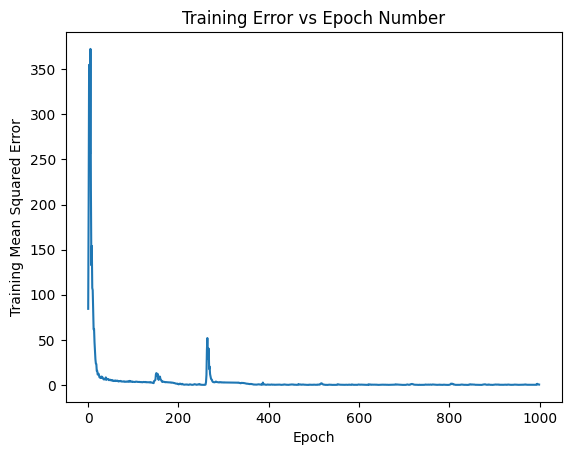

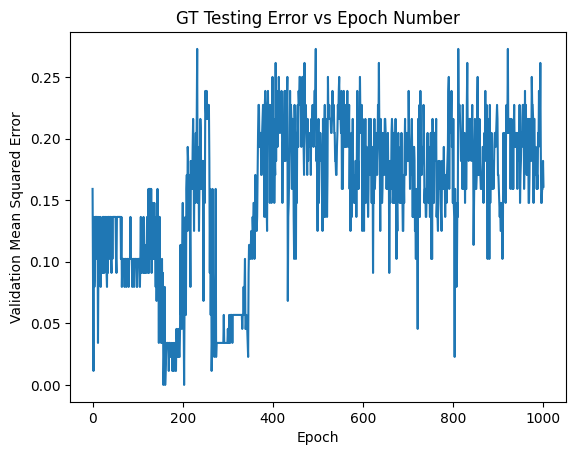

In [16]:
# epoch_losses_gt1 = np.loadtxt('trained_model_data/epoch_losses_GT_2.gz')
# evaluations_gt1 = np.loadtxt('trained_model_data/evaluations_GT_2.gz')

# plt.plot(epoch_losses_gt1)
# plt.title("Training Error vs Epoch Number")
# plt.xlabel("Epoch")
# plt.ylabel("Training Mean Squared Error")
# plt.show()

# plt.plot(evaluations_gt1)
# plt.title("GT Testing Error vs Epoch Number")
# plt.xlabel("Epoch")
# plt.ylabel("Validation Mean Squared Error")
# plt.show()


epoch_losses_gt_iso = np.loadtxt('model/trained_model_data/epoch_losses_E_GT_C.gz')
evaluations_gt_iso = np.loadtxt('model/trained_model_data/evaluations_E_GT_C.gz')

plt.plot(epoch_losses_gt_iso)
plt.title("Training Error vs Epoch Number")
plt.xlabel("Epoch")
plt.ylabel("Training Mean Squared Error")
plt.show()

plt.plot(evaluations_gt_iso)
plt.title("GT Testing Error vs Epoch Number")
plt.xlabel("Epoch")


plt.ylabel("Validation Mean Squared Error")
plt.show()


In [17]:
import model.data_utils as data_utils

dataset = data_utils.generate_intent_data_from_person("humoro/mogaze/p1_1")
print(len(dataset))


53899


In [18]:
print(dataset[1])

(tensor([[-0.0546,  0.0133,  0.7867,  ..., -0.0105, -0.0023, -0.0061],
        [-0.0546,  0.0133,  0.7867,  ..., -0.0104, -0.0023, -0.0062],
        [-0.0546,  0.0133,  0.7867,  ..., -0.0105, -0.0023, -0.0061],
        ...,
        [-0.0515,  0.0135,  0.7863,  ..., -0.0106, -0.0023, -0.0060],
        [-0.0515,  0.0135,  0.7863,  ..., -0.0105, -0.0024, -0.0063],
        [-0.0514,  0.0135,  0.7863,  ..., -0.0104, -0.0024, -0.0062]]), tensor(1.))
